In [12]:
import ilmsens_hal
import ilmsens_hal.utils

from ilmsens_hal.defn import diag
from ilmsens_hal.defn import meas_run
from ilmsens_hal.defn import meas_config
from ilmsens_hal.defn import config
from ilmsens_hal.types import ilmsens_hal_ModConfig

import numpy as np
import matplotlib.pyplot as plt

ver = ilmsens_hal.getVersion()
_ = ilmsens_hal.setDEBLevel(diag.ILMSENS_DEB_ALL)
# _ = ilmsens_hal.setDEBLevel(diag.ILMSENS_DEB_NO)
print(f"HAL Version: {ver.mMajor}.{ver.mMinor}.{ver.mBuild}")

HAL Version: 1.1.1


E.509 (5/N/ilmsens.hal): Debug level set to 4.


In [13]:

num_devices = ilmsens_hal.initHAL()
connected_devices = list(range(1, num_devices+1))
print(f"Found {num_devices} connected devices")

Found 1 connected devices


In [14]:


_ = ilmsens_hal.openSensors(connected_devices)

for idx in connected_devices:
    device_id = ilmsens_hal.getModId(idx)
    print(f"Sensor #{idx} has ID '{device_id.decode()}' (result was {len(device_id)}).")
print()

Sensor #1 has ID '' (result was 0).



E.724 (3/E/ilmsens.hal.teAPI): Timeout while reading FX2 firmware revision during FX2 init phase!
E.724 (8/T/ilmsens.hal.teAPI): ReadFX2SFR(0x2f33a20, 0x80)
E.724 (8/T/ilmsens.hal.teAPI): ReadFX2SFR: value=0xff
E.724 (7/D/ilmsens.hal): Opened device #1 received handle 0x2fd38c0
E.725 (8/T/ilmsens.hal.teAPI): readDevFlash(0x2f33a20, 0x400000, 0x2d0b0c0, 128)
E.735 (7/D/ilmsens.hal.teAPI): readDevFlash: rest=128
E.735 (7/D/ilmsens.hal.teAPI): readDevFlash: rest=64


In [15]:
selected_device_idx = 1

swavg = 3
wait_cyc = 0
mod_config = ilmsens_hal_ModConfig()
mod_config.mClk = 13.312
mod_config.mOV = 1 # 0 = use default
mod_config.mOrder = 9
mod_config.mRx = 2
mod_config.mSub = 0 # 0 = use default
mod_config.mTx = 0 # 0 = use default
ilmsens_hal.setupSensors([selected_device_idx], mod_config)
ilmsens_hal.setMaster([selected_device_idx], config.ILMSENS_HAL_MASTER_SENSOR)
ilmsens_hal.synchMS([selected_device_idx], meas_config.ILMSENS_HAL_SYNCH_OFF)
ilmsens_hal.synchMS([selected_device_idx], meas_config.ILMSENS_HAL_SYNCH_ON)
ilmsens_hal.setMLBS([selected_device_idx])
ilmsens_hal.setAvg([selected_device_idx], swavg, wait_cyc)
# ilmsens_hal.xt_internal_setDel([selected_device_idx], delay=10)

info = ilmsens_hal.getModInfo(selected_device_idx)
print("Configuration of selected sensor is :")
print("* RF system clock    [GHz]: {:.6f}".format(info.mConfig.mClk))
print("* MLBS order              : {}".format(info.mConfig.mOrder))
print("* Prescaler           1/  : {}".format(info.mConfig.mSub))
print("* Oversampling        x   : {}".format(info.mConfig.mOV))
print("* Number of Tx            : {}".format(info.mConfig.mTx))
print("* Number of Rx            : {}".format(info.mConfig.mRx))
print("* Number of samples per Rx: {}".format(info.mNumSamp))
print("* Hardware averages       : {}".format(info.mHWAvg))
print("* Software avg. limits    : [{} .. {}]".format(info.mAvgLim[0], info.mAvgLim[1]))
print("* Software averages       : {}".format(info.mAvg))
print("* Wait cycle limits       : [{} .. {}]".format(info.mWaitLim[0], info.mWaitLim[1]))
print("* Wait cycles             : {}".format(info.mWait))
print("* ADC full scale range [V]: [{:.6f} .. {:.6f}]".format(info.mFSR[0], info.mFSR[1]))
print("* ADC LSB voltage     [mV]: {:.6f}".format(info.mLSB_Volt*1000.0))
print("* Int. temperature    [\370C]: {:.2f}".format(info.mTemp))
print()

Configuration of selected sensor is :
* RF system clock    [GHz]: 13.312000
* MLBS order              : 9
* Prescaler           1/  : 512
* Oversampling        x   : 1
* Number of Tx            : 1
* Number of Rx            : 2
* Number of samples per Rx: 511
* Hardware averages       : 48
* Software avg. limits    : [1 .. 5461]
* Software averages       : 3
* Wait cycle limits       : [0 .. 16383]
* Wait cycles             : 0
* ADC full scale range [V]: [-0.800000 .. 0.799902]
* ADC LSB voltage     [mV]: 0.097656
* Int. temperature    [øC]: 32.56



E.764 (8/T/ilmsens.hal.teAPI): WriteRegister(0x2f33a20, 0x800008, 0x1ff0200)
E.764 (8/T/ilmsens.hal.teAPI): WriteRegister(0x2f33a20, 0x800018, 0x1)
E.764 (8/T/ilmsens.hal.teAPI): ReadRegister(0x2f33a20, 0x800000, 0x7ffe90c5326c)
E.765 (8/T/ilmsens.hal.teAPI): WriteRegister(0x2f33a20, 0x800020, 0x1cfe93)
E.775 (8/T/ilmsens.hal.teAPI): WriteRegister(0x2f33a20, 0x800020, 0x1cfe92)
E.785 (8/T/ilmsens.hal.teAPI): WriteRegister(0x2f33a20, 0x800020, 0x120008)
E.795 (8/T/ilmsens.hal.teAPI): WriteRegister(0x2f33a20, 0x800020, 0x101)
E.805 (8/T/ilmsens.hal.teAPI): ReadRegister(0x2f33a20, 0x80001c, 0x7ffe90c5440c)
E.805 (8/T/ilmsens.hal.teAPI): WriteRegister(0x2f33a20, 0x80001c, 0x1b910040)
E.806 (8/T/ilmsens.hal.teAPI): WriteRegister(0x2f33a20, 0x800014, 0x801800)
E.816 (8/T/ilmsens.hal.teAPI): ReadRegister(0x2f33a20, 0x800014, 0x7ffe90c543dc)
E.816 (8/T/ilmsens.hal.teAPI): WriteRegister(0x2f33a20, 0x800014, 0x18d8)
E.826 (8/T/ilmsens.hal.teAPI): ReadRegister(0x2f33a20, 0x800014, 0x7ffe90c543dc)

In [87]:

ilmsens_hal.xt_internal_setDel([selected_device_idx], delay=5)

-2

In [16]:
# run measurement

# ilmsens_hal.xt_internal_setDel([selected_device_idx], delay=5)
ilmsens_hal.setPD([selected_device_idx], meas_config.ILMSENS_HAL_TX_ON)
ilmsens_hal.measRun([selected_device_idx], meas_run.ILMSENS_HAL_RUN_BUF)
data, _ = ilmsens_hal.measGet([selected_device_idx], timeout_millis=100)
ilmsens_hal.measStop([selected_device_idx])


dependencies = ilmsens_hal.utils.read_dependencies(
    mDR_MLBS_Order=mod_config.mOrder,
    mDR_F0_Clk=mod_config.mClk,
    mDR_OV=mod_config.mOV
)

data = ilmsens_hal.utils.parse_data(data)
data = np.array(data['rx1_samples'], dtype=np.double)

# scale data to represent physical voltage
averages = info.mHWAvg * swavg
value_scale = 1.0 / averages * info.mLSB_Volt
off_value = 0.0
data = (data - off_value) * value_scale

# correlate the data with the ideal sequence
data = np.fft.fft(data, axis=0)
data = data * dependencies['mDR_Ref_Spec'][:]
data = np.fft.ifft(data, axis=0)

E.333 (8/T/ilmsens.hal.teAPI): ReadRegister(0x2f33a20, 0x800000, 0x7ffe90c5457c)
E.334 (8/T/ilmsens.hal.teAPI): WriteRegister(0x2f33a20, 0x800000, 0x30001e)
E.334 (8/T/ilmsens.hal.teAPI): ReadRegister(0x2f33a20, 0x800000, 0x7ffe90c544fc)
E.334 (8/T/ilmsens.hal.teAPI): ReadRegister(0x2f33a20, 0x800004, 0x7ffe90c544fc)
E.334 (8/T/ilmsens.hal.teAPI): WriteRegister(0x2f33a20, 0x800004, 0x5)
E.334 (5/N/ilmsens.hal): Calculated timer interval is 1 ms.
E.334 (8/T/ilmsens.hal.teAPI): ReadRegister(0x2f33a20, 0x800004, 0x7f484a1b4b4c)
E.334 (8/T/ilmsens.hal.teAPI): ReadRegister(0x2f33a20, 0x800004, 0x7f484a1b4b4c)
E.336 (8/T/ilmsens.hal.teAPI): ReadRegister(0x2f33a20, 0x800004, 0x7f484a1b4b4c)
E.337 (8/T/ilmsens.hal.teAPI): ReadRegister(0x2f33a20, 0x800004, 0x7f484a1b4b4c)
E.338 (8/T/ilmsens.hal.teAPI): ReadRegister(0x2f33a20, 0x800004, 0x7f484a1b4b4c)
E.338 (8/T/ilmsens.hal.teAPI): ReadBlock(0x2f33a20, 0x0, 0x7f48440008f0, 4096, 1)
E.339 (8/T/ilmsens.hal.teAPI): ReadRegister(0x2f33a20, 0x800004

/home/mp-gpr/miniconda3/envs/ilmsens/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/mp-gpr/miniconda3/envs/ilmsens/lib/python3.9/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


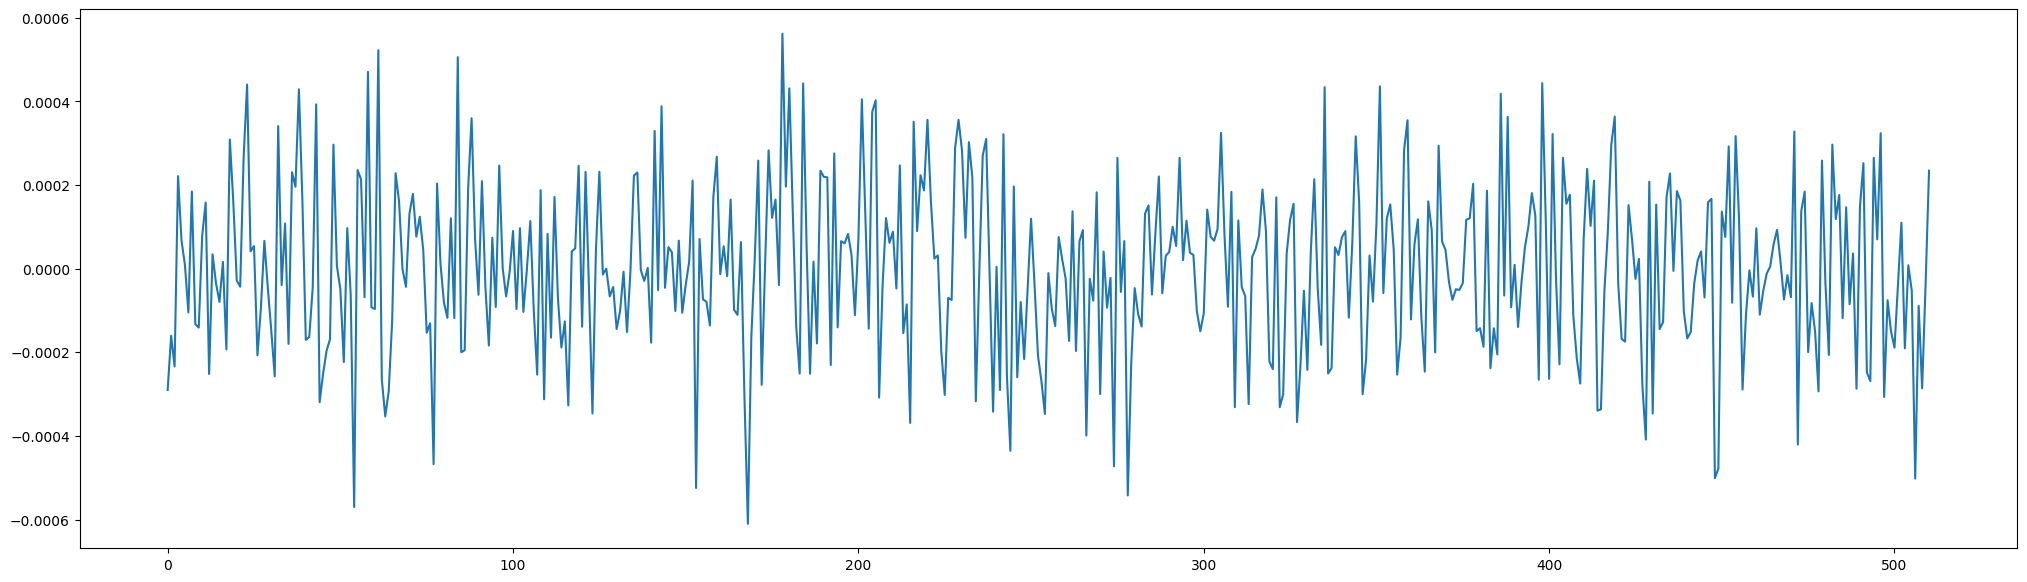

In [17]:
plt.figure(figsize=(25, 7))
plt.plot(data)

In [86]:
ilmsens_hal.deinitHAL()